In [3]:
import pandas as pd
import re

Process Book Reviews dataset from Kaggle

In [149]:
# Load dataset
df = pd.read_csv("data/Book Reviews.csv")

# Display dataset
df.head()

,Unnamed: 0,Book,Review,Review Date
0,0,To Kill a Mockingbird,/// gentle reminder that this is not the time ...,"March 24, 2022"
1,1,To Kill a Mockingbird,\n|\n|6.0 stars. I know I am risking a serious...,"May 24, 2011"
2,2,To Kill a Mockingbird,\n|\n|Looking for a new book but don't want to...,"December 10, 2020"
3,3,To Kill a Mockingbird,"To Kill a Mockingbird, Harper Lee|To Kill a Mo...","July 1, 2022"
4,4,To Kill a Mockingbird,Why is it when I pick up | To Kill A Mockingbi...,"October 25, 2009"


In [150]:
df.dtypes

Unnamed: 0      int64
Book           object
Review         object
Review Date    object
dtype: object

In [151]:
df.shape

(32081, 4)

In [152]:
df = df.drop(columns=['Unnamed: 0', 'Review Date'])
df.rename(columns={'Book': 'title', 'Review': 'review_text'}, inplace=True)

df.dtypes

title          object
review_text    object
dtype: object

In [153]:
df = df.dropna(subset=['title', 'review_text'])

print(f"Dataset shape after dropping empty values: {df.shape}")

Dataset shape after dropping empty values: (31772, 2)


In [154]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Detect language
df['language'] = df['review_text'].astype(str).apply(detect_language)

In [156]:
df[['review_text', 'language']].sample(10)

,review_text,language
23433,So. This is an old story and terribly familiar...,en
20345,Anatole France took an old legend about the c...,en
4421,Είναι από αυτές τις φορές που τα πέντε αστεράκ...,el
8987,"I've marked this book as ""read"" but actually I...",en
9801,"Uno de los mejores libros del siglo XX|, al de...",es
25372,"This is the fourth Galdós novel I have read, a...",en
7026,7/10,unknown
30634,I loved this book SO MUCH!!!! I have to say th...,en
17329,This collection of short stories had no discer...,en
12417,مگر میشود رنج های ورتر جوان را بخوانی و از زیب...,fa


In [157]:
# Keep only English reviews
df = df[df['language'] == 'en']

df = df.drop(columns=['language'])

print(f"Dataset shape after removing non-English reviews: {df.shape}")

Dataset shape after removing non-English reviews: (23035, 2)


In [158]:
import re
import html
import contractions

def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    text = html.unescape(text)

    # Remove unwanted special characters (but keep !, ?, and . for sentiment)
    text = re.sub(r"[^a-zA-Z0-9\s!?.,]", "", text)

    text = contractions.fix(text)

    # Remove extra whitespaces
    text = re.sub(r"\s+", " ", text).strip()

    text = text.lower()

    return text

df['cleaned_review'] = df['review_text'].astype(str).apply(clean_text)

df[['review_text', 'cleaned_review']].sample(10)

,review_text,cleaned_review
7107,There were a lot of interesting passages in th...,there were a lot of interesting passages in th...
19927,Sandwiched between Eclipse and Ancient Light t...,sandwiched between eclipse and ancient light t...
5973,"""Charish the cathedrals of your souls""...|This...",charish the cathedrals of your souls...this no...
9451,"I like Jim Crace a great deal, and his Gift of...","i like jim crace a great deal, and his gift of..."
4336,"This book outraged many Irish readers, with it...","this book outraged many irish readers, with it..."
31349,Gabrielle Roy has marvelous powers of descript...,gabrielle roy has marvelous powers of descript...
19105,Superbly written…a very enjoyable novel that l...,superbly writtena very enjoyable novel that le...
21967,A punnilinguistic |tour de farce|—a hip and sw...,a punnilinguistic tour de farcea hip and swing...
379,"Of all the French literary classics, undoubted...","of all the french literary classics, undoubted..."
21420,So much better than 'Fight Club.' It's not as ...,so much better than fight club. its not as gro...


In [159]:
df.to_csv("cleaned_book_reviews.csv", index=False)

# Data Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_book_reviews.csv')

In [168]:
num_unique_titles = df['title'].nunique()
print(f"Number of unique titles: {num_unique_titles}")

Number of unique titles: 1091


count    1096.000000
mean       21.017336
std         7.197835
min         1.000000
25%        16.000000
50%        23.000000
75%        27.000000
max        30.000000
Name: count, dtype: float64


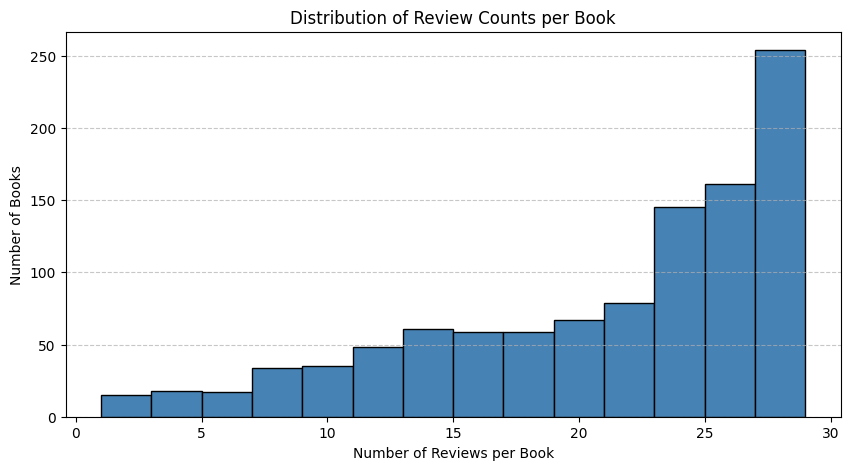

In [162]:
# Count reviews per book
review_counts = df['title'].value_counts()

# Summary statistics
print(review_counts.describe())

# Plot histogram of review counts per book
plt.figure(figsize=(10, 5))
plt.hist(review_counts, bins=np.arange(1, review_counts.max() + 1, 2), color='steelblue', edgecolor='black')
plt.xlabel("Number of Reviews per Book")
plt.ylabel("Number of Books")
plt.title("Distribution of Review Counts per Book")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

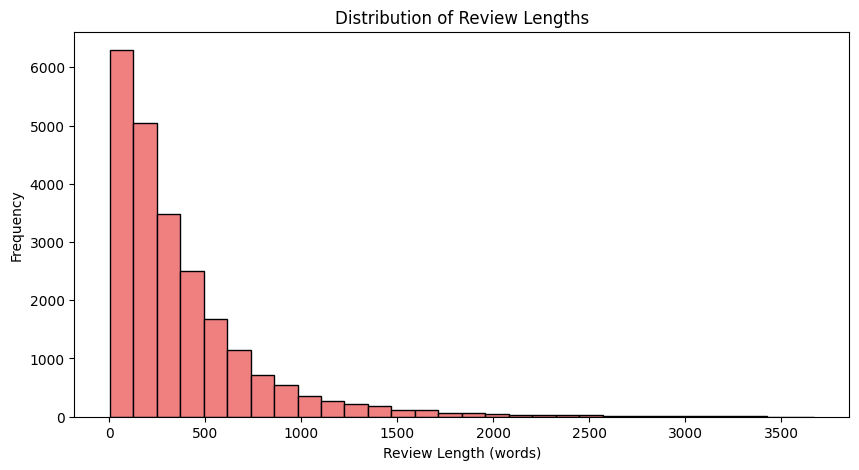

In [163]:
# Compute review length (word count)
df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))

# Plot review length distribution
plt.figure(figsize=(10, 5))
plt.hist(df['review_length'], bins=30, color='lightcoral', edgecolor='black')
plt.xlabel("Review Length (words)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()

In [164]:
review_length_stats = df['review_length'].describe()

print(review_length_stats)

count    23035.000000
mean       374.118559
std        407.248773
min          1.000000
25%        113.000000
50%        251.000000
75%        487.000000
max       3672.000000
Name: review_length, dtype: float64


In [165]:
word_count_10th_percentile = df['review_length'].quantile(0.10)
print(word_count_10th_percentile)

45.0


In [166]:
df = df[df['review_length'] >= word_count_10th_percentile].reset_index(drop=True)

df = df.drop(columns=['review_length'])

In [ ]:
# Select m unique books
selected_books = df['title'].drop_duplicates().head(5)

# Filter reviews only for these n books
testing_df = df[df['title'].isin(selected_books)]

In [171]:
testing_df.to_csv("for_testing.csv", index=False)

# TESTING WITH SMALL DATASET

In [173]:
df = pd.read_csv("for_testing.csv")

df.head()

,title,review_text,cleaned_review
0,To Kill a Mockingbird,/// gentle reminder that this is not the time ...,gentle reminder that this is not the time to r...
1,To Kill a Mockingbird,\n|\n|6.0 stars. I know I am risking a serious...,6.0 stars. i know i am risking a serious film ...
2,To Kill a Mockingbird,\n|\n|Looking for a new book but don't want to...,looking for a new book but do not want to comm...
3,To Kill a Mockingbird,Why is it when I pick up | To Kill A Mockingbi...,why is it when i pick up to kill a mockingbird...
4,To Kill a Mockingbird,I had a much longer review written for this bo...,i had a much longer review written for this bo...


In [174]:
import pandas as pd
from openai import OpenAI
import os
from dotenv import load_dotenv

load_dotenv()
openai_api_key = os.getenv('OPENAI_API_KEY')

client = OpenAI(api_key = openai_api_key)

cost_per_1k_tokens = 0.002  # Adjust based on the OpenAI pricing for GPT-4o-mini

total_tokens_used = 0
total_cost = 0.0

def estimate_cost(tokens_used):
    return (tokens_used / 1000) * cost_per_1k_tokens

def extract_review_aspects(review):
    global total_tokens_used
    global total_cost

    prompt = f"""
    Analyze the following book review and extract the unique and nuanced aspects of the book that the reader particularly commented on.
    
    Instead of predefined categories like 'Character Development' or 'World-building,' focus on specific insights the reviewer expresses. These should be framed in an organic way, capturing how the reviewer experienced and articulated their enjoyment of the book.

    Instructions:
    - Extract around 5 key aspects.
    - Do NOT use generic terms like "intricate plot twists" or "emotional depth."
    - Instead, identify book-specific observations (e.g., "Kaz Brekker’s morally ambiguous leadership" instead of "complex characters").
    - Capture distinctive stylistic elements, unusual themes, and memorable storytelling choices.
    - Use the reviewer's own language where possible.
    - Format the response as a valid JSON object where:
      - Each key is a brief descriptive insight (max 5 words).
      - Each value is an object containing:
        - `"explanation"`: A 1-2 sentence explanation based on the review’s language.

    Example Output (JSON format):
      ```json
      {{
        "Grisha magic and political tension": {{
          "explanation": "The reviewer describes the unique magic system intertwined with high-stakes political intrigue, making the world feel immersive and dangerous."
        }},
        "Unexpectedly humorous narration": {{
          "explanation": "The book’s witty and ironic tone added levity, contrasting well with its serious themes."
        }},
        "Ambiguous moral dilemmas": {{
          "explanation": "The novel presents ethical conflicts without clear resolutions, prompting deep reflection from the reader."
        }}
      }}

    Book Review:
    "{review}"
    """

    print(prompt)
    # print(review)

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7
    )
    response_text = response.choices[0].message.content
    tokens_used = response.usage.total_tokens
    total_tokens_used += tokens_used
    total_cost += estimate_cost(tokens_used)
    return response_text


In [ ]:
from tqdm import tqdm

tqdm.pandas()

df['review_aspects'] = df['cleaned_review'].progress_apply(extract_review_aspects)

# Save to CSV
df.to_csv("extracted_review_aspects.csv", index=False)

# Print cost summary
print(f"Total Tokens Used: {total_tokens_used}")
print(f"Estimated Total Cost: ${total_cost:.4f}")

In [236]:
df_check = pd.read_csv("extracted_review_aspects.csv")

# df_check.head()

In [5]:
import json
import re

def clean_and_convert_to_json(text):
    """Fixes common JSON formatting issues before parsing, including missing closing braces."""
    if not isinstance(text, str) or text.strip() == "":
        return None  # Ignore empty or non-string values

    # Remove markdown formatting if present
    text = text.strip().replace("```json", "").replace("```", "").replace("\n", " ")

    # Fix trailing commas before closing braces (`}`) and brackets (`]`)
    text = re.sub(r",\s*}", "}", text)  # Removes extra commas before }
    text = re.sub(r",\s*\]", "]", text)  # Removes extra commas before ]

    # Ensure JSON has a final closing brace if needed
    if text.count("{") > text.count("}"):  # If more `{` than `}`, add missing `}`
        text += "}"

    try:
        return json.loads(text)  # Try parsing JSON
    except json.JSONDecodeError as e:
        print(f"❌ JSON Parsing Error: {e}")
        print(f"🔍 Problematic JSON Snippet: {text[:500]}...\n")  # Show first 500 characters for debugging

# Apply function to DataFrame
df_check['review_aspects'] = df_check['review_aspects'].apply(clean_and_convert_to_json)


NameError: name 'df_check' is not defined

In [238]:
df_check.head()

,title,review_text,cleaned_review,review_aspects
0,To Kill a Mockingbird,/// gentle reminder that this is not the time ...,gentle reminder that this is not the time to r...,{'White perspective on race relations': {'expl...
1,To Kill a Mockingbird,\n|\n|6.0 stars. I know I am risking a serious...,6.0 stars. i know i am risking a serious film ...,{'Atticus Finch's moral integrity': {'explanat...
2,To Kill a Mockingbird,\n|\n|Looking for a new book but don't want to...,looking for a new book but do not want to comm...,{'Rethinking childhood interpretations': {'exp...
3,To Kill a Mockingbird,Why is it when I pick up | To Kill A Mockingbi...,why is it when i pick up to kill a mockingbird...,{'Sensory nostalgia of childhood': {'explanati...
4,To Kill a Mockingbird,I had a much longer review written for this bo...,i had a much longer review written for this bo...,{'Boredom with narrative pacing': {'explanatio...


test with vader

In [58]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import json
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()


def classify_sentiment(text):
    sentiment_score = sia.polarity_scores(text)["compound"]
    if sentiment_score >= 0.05:
        return "positive"
    elif sentiment_score <= -0.05:
        return "negative"
    else:
        return "neutral/mixed"

# Apply sentiment analysis to each aspect in the dataset
def apply_sentiment_analysis(review_aspects):
    for aspect, details in review_aspects.items():
        explanation = details["explanation"]
        sentiment = classify_sentiment(explanation)
        review_aspects[aspect]["sentiment"] = sentiment
    return json.dumps(review_aspects, indent=2)  # Convert back to string for DataFrame storage

# Apply function to each row
test_df["review_aspects_with_sentiment"] = test_df["review_aspects"].apply(apply_sentiment_analysis)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kayweeee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [64]:
from textblob import TextBlob

# Function to classify sentiment using TextBlob
def classify_sentiment_textblob(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return "positive"
    elif sentiment_score < 0:
        return "negative"
    else:
        return "neutral/mixed"

# Apply sentiment analysis using TextBlob
def apply_sentiment_analysis_textblob(review_aspects):
    for aspect, details in review_aspects.items():
        explanation = details["explanation"]
        sentiment = classify_sentiment_textblob(explanation)
        review_aspects[aspect]["sentiment"] = sentiment
    return json.dumps(review_aspects, indent=2)  # Convert back to string for DataFrame storage

# Apply function to each row
test_df["review_aspects_with_sentiment"] = test_df["review_aspects"].apply(apply_sentiment_analysis_textblob)


In [80]:
test_df.to_csv("sentiment_analysis_using_textblob.csv", index=False)

## Book Level Aspects

In [240]:
df_books = df_check.groupby('title')['review_aspects'].apply(list).reset_index()

df_books.head()


,title,review_aspects
0,1984,[{'Dystopian world as a character': {'explanat...
1,Animal Farm,[{'Orwellian themes in modern context': {'expl...
2,Jane Eyre,[{'Feminist perspective on Jane Eyre': {'expla...
3,The Catcher in the Rye,[{'Evolution of personal connection': {'explan...
4,To Kill a Mockingbird,[{'White perspective on race relations': {'exp...


In [244]:
from openai import OpenAI

from dotenv import load_dotenv

load_dotenv()
openai_api_key = os.getenv('OPENAI_API_KEY')

client = OpenAI(api_key = openai_api_key)

# Function to extract book-level aspects using LLM
def extract_book_level_aspects(review_aspects_list):
    if isinstance(review_aspects_list, list):  
        review_aspects_list = json.dumps(review_aspects_list, indent=2)  # Convert list to JSON
    
    prompt = f"""
    The following is a collection of review-level aspects extracted from multiple reviews of the same book. 
    Identify and summarize the most significant and recurring themes, insights, or unique elements that define this book as a whole.
    
    Instructions:
    - Consolidate similar aspects into broader book-level insights.
    - Focus on the most mentioned, impactful and unique insights.
    - Determine the general sentiment of each aspect by analyzing how it was described across reviews.
    - If an aspect has a mixed reception, reflect that in the summary.
    - Count how many reviews mention each aspect, and include that in the final output.

    - Return the result as a JSON object where:
      - Each key is a concise, descriptive book-level insight (no more than 5 words).
      - Each value is an object with:
        - `"explanation"`: A 1-2 sentence explanation, summarizing the aspect across all reviews.
        - `"sentiment"`: The general sentiment of the aspect ("positive", "negative", or "mixed"), based on how it was perceived in the reviews.
        - `"mention_count"`: The number of reviews that mentioned this aspect.

    
    Review-Level Aspects:
    {review_aspects_list}    

    ```json
    {{
      "Complex Political Themes": {{
        "explanation": "The book explores intricate political themes, drawing parallels to real-world authoritarian regimes and control mechanisms.",
        "sentiment": "positive",
        "mention_count": 12
      }},
      "Character Development": {{
        "explanation": "The protagonist's psychological depth and internal conflicts were widely appreciated, though a few readers found certain character arcs underdeveloped.",
        "sentiment": "positive",
        "mention_count": 15
      }}
    }}
    ```
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7
    )
    response_text = response.choices[0].message.content

    return response_text

test_text = df_books['review_aspects'].iloc[0]

# print(test_text)
# res = extract_book_level_aspects(test_text)

# print(res)
# Apply function to extract book-level aspects
df_books['book_aspects'] = df_books['review_aspects'].progress_apply(extract_book_level_aspects)
df_books.to_csv('book_aspects.csv', index=False)

100%|██████████| 5/5 [01:14<00:00, 14.84s/it]


Separate the json into columns

In [246]:
df_books = pd.read_csv('book_aspects.csv')

In [252]:
def parse_book_aspects(df_books):
    """
    Parses the LLM-generated book-level aspects and structures them into a DataFrame.

    Args:
        df_books (pd.DataFrame): DataFrame with book title, review aspects, and LLM-generated book aspects.

    Returns:
        pd.DataFrame: A structured DataFrame with parsed book-level aspects.
    """
    parsed_data = []

    for _, row in df_books.iterrows():
        title = row["title"] 
        review_aspects = row["review_aspects"] 

        book_aspects = clean_and_convert_to_json(row["book_aspects"]) 
    

        for aspect, details in book_aspects.items():
            parsed_data.append({
                "title": title,
                "review_aspects": review_aspects,
                "book_aspect": aspect,
                "book_aspect_explanation": details.get("explanation", ""),
                "book_aspect_sentiment": details.get("sentiment", "neutral"),
                "book_aspect_mention_count": details.get("mention_count", 0),
                "aspect_embedding": get_embedding(aspect)
            })

    return pd.DataFrame(parsed_data)

def get_embedding(text):
    text = text.lower()
    response = client.embeddings.create(
        model="text-embedding-ada-002",
        input=text
    )
    return response.data[0].embedding

df_parsed_aspects = parse_book_aspects(df_books)

df_parsed_aspects.to_csv('book_aspects_table.csv', index=False)


Creating book table (which has book metadata)

In [11]:
import pandas as pd
df_books = pd.read_csv('book_aspects.csv')

df_books.head()

,title,review_aspects,book_aspects
0,1984,[{'Dystopian world as a character': {'explanat...,"```json\n{\n ""Dystopian Worldbuilding"": {\n ..."
1,Animal Farm,[{'Orwellian themes in modern context': {'expl...,"```json\n{\n ""Relevance of Orwellian Themes"":..."
2,Jane Eyre,[{'Feminist perspective on Jane Eyre': {'expla...,"```json\n{\n ""Feminist Themes and Perspective..."
3,The Catcher in the Rye,[{'Evolution of personal connection': {'explan...,"```json\n{\n ""Evolving Perspectives on Holden..."
4,To Kill a Mockingbird,[{'White perspective on race relations': {'exp...,"```json\n{\n ""Racial Dynamics and Injustice"":..."


In [14]:
import os
import requests
from dotenv import load_dotenv

load_dotenv()
google_books_api_key = os.getenv('GOOGLE_BOOKS_API_KEY')

# Function to fetch book details from Google Books API with improved filtering
def fetch_book_details(title):
    url = f"https://www.googleapis.com/books/v1/volumes?q=intitle:{title}&key={google_books_api_key}"
    response = requests.get(url)
    data = response.json()

    if not data.get("items"):
        return {
            "title": title,
            "authors": ["Unknown"],
            "summary": "No details found",
            "cover_image": None,
            "average_rating": None,
            "ratings_count": None,
        }

    best_match = None

    for book in data["items"]:
        volume_info = book["volumeInfo"]
        book_title = volume_info.get("title", "").lower()

        # Check if title is a close match (ignores case and minor differences)
        if title.lower() == book_title:
            if not best_match:
                best_match = volume_info
            else:
                # Prefer book with more ratings (better public validation)
                if volume_info.get("ratingsCount", 0) > best_match.get("ratingsCount", 0):
                    best_match = volume_info
                # If same rating count, prefer more recent editions
                elif volume_info.get("ratingsCount", 0) == best_match.get("ratingsCount", 0):
                    if volume_info.get("publishedDate", "0") > best_match.get("publishedDate", "0"):
                        best_match = volume_info

    if not best_match:
        return {
            "title": title,
            "authors": ["Unknown"],
            "summary": "No details found",
            "cover_image": None,
            "average_rating": None,
            "ratings_count": None,
        }

    return {
        "title": best_match.get("title", title),
        "authors": best_match.get("authors", ["Unknown"]),
        "summary": best_match.get("description", "No summary available"),
        "cover_image": best_match.get("imageLinks", {}).get("thumbnail", None),
        "average_rating": best_match.get("averageRating", None),
        "ratings_count": best_match.get("ratingsCount", None),
    }


In [15]:
from tqdm import tqdm  # For progress tracking

book_metadata = []
for title in tqdm(df_books["title"], desc="Fetching book metadata"):
    details = fetch_book_details(title)
    book_metadata.append(details)

Fetching book metadata: 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]


In [16]:
df_metadata = pd.DataFrame(book_metadata)

# Display the first few rows of metadata
df_metadata = pd.merge(df_metadata, df_books[['title', 'review_aspects']], on='title', how='left')
df_metadata.head()


,title,authors,summary,cover_image,average_rating,ratings_count,review_aspects
0,1984,[George Orwell],It is 1984. The world is in a state of perpetu...,http://books.google.com/books/content?id=Ku0wE...,4.0,64,[{'Dystopian world as a character': {'explanat...
1,Animal Farm,[George Orwell],George Orwell was a much-respected English nov...,http://books.google.com/books/content?id=tJf8D...,5.0,1,[{'Orwellian themes in modern context': {'expl...
2,Jane Eyre,[Charlotte Brontë],"Bronte’s novel about a shy, quiet governess wh...",http://books.google.com/books/content?id=lSMGA...,4.5,159,[{'Feminist perspective on Jane Eyre': {'expla...
3,The Catcher in the Rye,[Jerome David Salinger],J. D. Salinger wrote one of the most famous bo...,http://books.google.com/books/content?id=PCDen...,2.5,2,[{'Evolution of personal connection': {'explan...
4,To Kill a Mockingbird,[Harper Lee],Harper Lee's classic novel of a lawyer in the ...,http://books.google.com/books/content?id=DRagK...,5.0,1,[{'White perspective on race relations': {'exp...


In [17]:
df_metadata.to_csv('book_table.csv', index=False)